In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
path = "../DataSet/"

In [3]:
df = pd.read_csv(path + 'Dataset_Final.csv') 

In [4]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


In [5]:
def tuning(eps, min_samples, df, it):
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(df)
    
    
    labels= dbscan_model_.labels_
    
    if -1 in labels:
        neighboors = NearestNeighbors(n_neighbors = 5).fit(df)
        distances, indices = neighboors.kneighbors(df)
        noise_distances = distances[labels, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
    
    number_of_clusters = len(set(labels[labels >= 0]))
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (it, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [6]:
# Risultati della grid Search
# Dataframe per la metrica sulla distanza media dei noise points dai 5 punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [7]:
# Esecuzione della grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[features])

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = tuning(eps, min_samples, scaled_features, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 |  1.15    0
  2 | Tested with eps = 0.1 and min_samples =  10 |  1.15    0
  3 | Tested with eps = 0.1 and min_samples =  15 |  1.15    0
  4 | Tested with eps = 0.1 and min_samples =  20 |  1.15    0
  5 | Tested with eps = 0.1 and min_samples =  25 |  1.15    0
  6 | Tested with eps = 0.1 and min_samples =  30 |  1.15    0
  7 | Tested with eps = 0.1 and min_samples =  35 |  1.15    0
  8 | Tested with eps = 0.1 and min_samples =  40 |  1.15    0
  9 | Tested with eps = 0.1 and min_samples =  45 |  1.15    0
 10 | Tested with eps = 0.2 and min_samples =   5 |  1.15    0
 11 | Tested with eps = 0.2 and min_samples =  10 |  1.15    0
 12 | Tested with eps = 0.2 and min_samples =  15 |  1.15    0
 13 | Tested with eps = 0.2 and min_samples =  20 |  1.15    0
 14 | Tested with eps = 0.2 and min_samples =  25

131 | Tested with eps = 1.5 and min_samples =  25 | 0.895    1
132 | Tested with eps = 1.5 and min_samples =  30 | 0.903    1
133 | Tested with eps = 1.5 and min_samples =  35 | 0.904    1
134 | Tested with eps = 1.5 and min_samples =  40 | 0.908    1
135 | Tested with eps = 1.5 and min_samples =  45 | 0.909    1
136 | Tested with eps = 1.6 and min_samples =   5 | 0.875    1
137 | Tested with eps = 1.6 and min_samples =  10 | 0.877    1
138 | Tested with eps = 1.6 and min_samples =  15 | 0.879    1
139 | Tested with eps = 1.6 and min_samples =  20 | 0.881    1
140 | Tested with eps = 1.6 and min_samples =  25 | 0.888    1
141 | Tested with eps = 1.6 and min_samples =  30 |  0.89    1
142 | Tested with eps = 1.6 and min_samples =  35 | 0.897    1
143 | Tested with eps = 1.6 and min_samples =  40 | 0.899    1
144 | Tested with eps = 1.6 and min_samples =  45 | 0.899    1
145 | Tested with eps = 1.7 and min_samples =   5 | 0.874    1
146 | Tested with eps = 1.7 and min_samples =  10 | 0.8

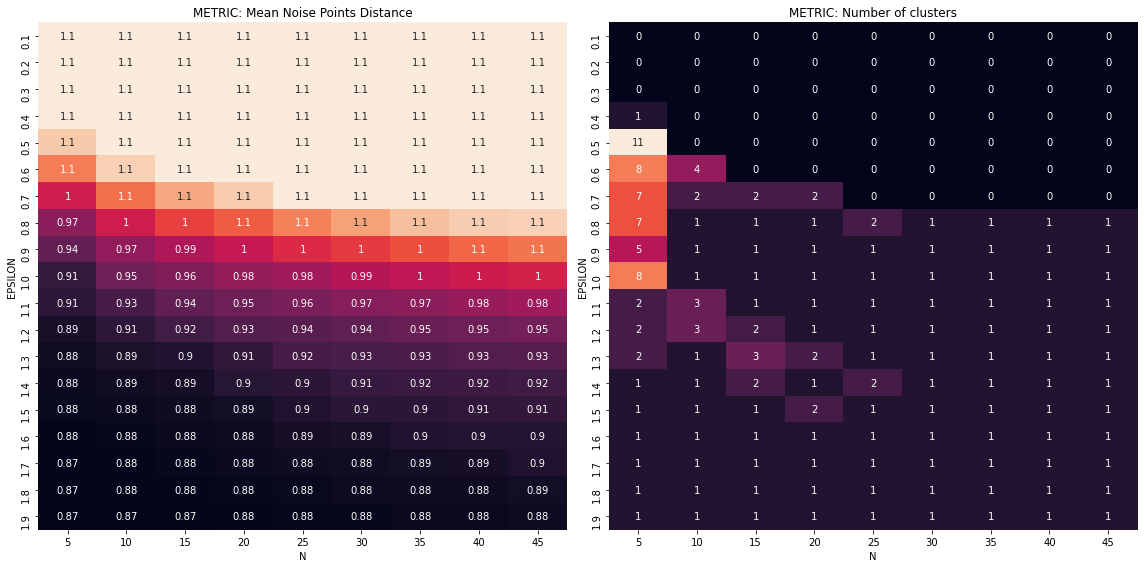

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

Analizzando le due heatmap ci accorgiamo che per valori molto bassi di ε praticamente tutti i punti vengono identificati come noise points (0 cluster). Viceversa, per valori molto alti di ε tendiamo ad avere un solo cluster.

Scegliamo non più di tre cluster perchè aumentandone il numero otteniamo clusters sempre più piccoli e meno significativi.
Per questo motivo la ricerca si restringe a valori 1.0 < ε < 1.4 e 5 < n < 20.

Scegliamo allora n=10 ed ε=1.1 che ci restituiscono mediamente dei noise points più distanti.

E adesso vediamo come performa questo "miglior" modello:

In [21]:
best_dbscan_model = DBSCAN(eps = 1.1, min_samples = 10)

# Fitting
best_dbscan_model.fit(scaled_features)

x = df[features].copy()
# Extracting labels
x["Label"] = best_dbscan_model.labels_

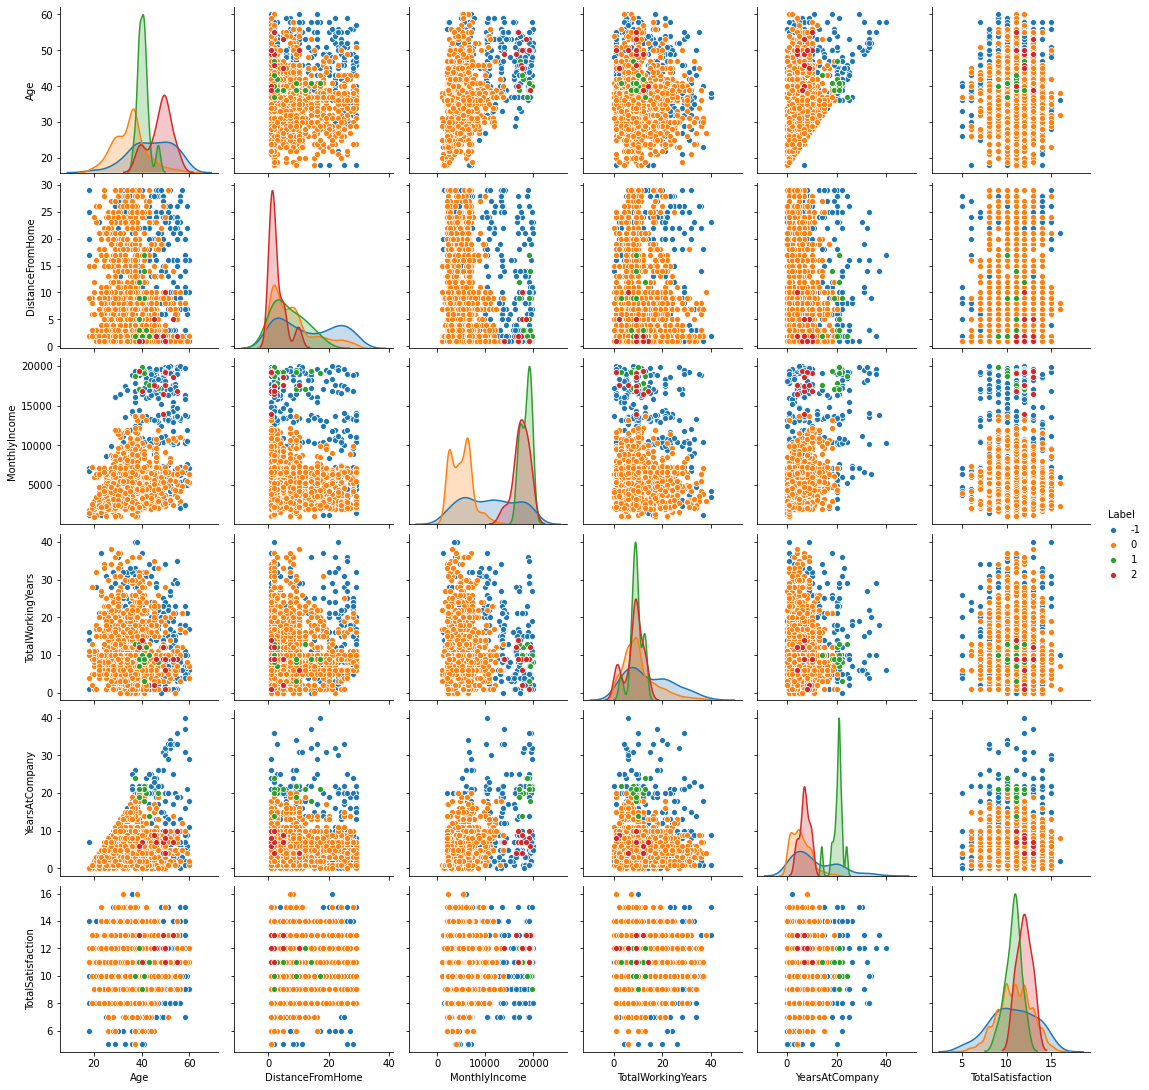

In [22]:
sns.pairplot(x, hue = "Label" )
plt.show()

In [23]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 306, 1140,   13,   11], dtype=int64))

In [24]:
print('Silhouette %s' % silhouette_score(scaled_features, best_dbscan_model.labels_))

Silhouette 0.23530885180124708


## Plot sugli errori

In [25]:
x["ChildWorking"] = [1 if ( ( (c[0] - c[3]) < 18) & ((c[0] - c[3]) > 0)) else 0 for c in x.values]

x["PreviusBirthWorking"] = [1 if ( (c[0] - c[3]) <= 0 ) else 0 for c in x.values]

x["IllegalWorking"] = [1 if ((c[4] > c[3]) & (c[7]==0))  else 0 for c in x.values]

In [26]:
df_copy = x.copy()

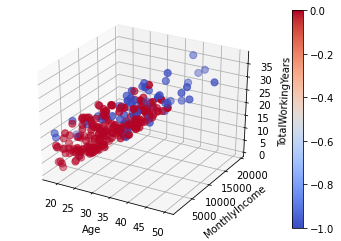

In [30]:
w = df_copy[df_copy["ChildWorking"] == 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', facecolor='white')
x = w['Age']
y = w['MonthlyIncome']
z = w['TotalWorkingYears']

p = ax.scatter(x,y,z, marker="o", c=w["Label"], s=50, cmap='coolwarm')
fig.colorbar(p)
ax.set_xlabel('Age')
ax.set_ylabel('MonthlyIncome')
ax.set_zlabel('TotalWorkingYears')
plt.show()

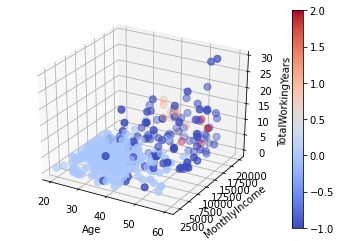

In [31]:
w = df_copy[df_copy["IllegalWorking"] == 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', facecolor='white')
x = w['Age']
y = w['MonthlyIncome']
z = w['TotalWorkingYears']

p = ax.scatter(x,y,z, marker="o", c=w["Label"], s=50, cmap="coolwarm")
fig.colorbar(p)
ax.set_xlabel('Age')
ax.set_ylabel('MonthlyIncome')
ax.set_zlabel('TotalWorkingYears')
plt.show()

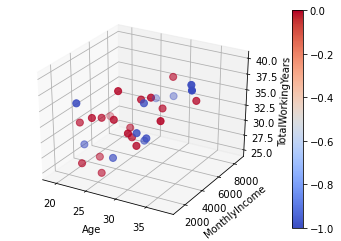

In [32]:
w = df_copy[df_copy["PreviusBirthWorking"] == 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', facecolor='white')
x = w['Age']
y = w['MonthlyIncome']
z = w['TotalWorkingYears']

p = ax.scatter(x,y,z, marker="o", c=w["Label"], s=50, cmap="coolwarm")
fig.colorbar(p)
ax.set_xlabel('Age')
ax.set_ylabel('MonthlyIncome')
ax.set_zlabel('TotalWorkingYears')
plt.show()

# Prova solo dei Validi

In [28]:
# Risultati della grid Search
# Dataframe per la metrica sulla distanza media dei noise points dai 5 punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [29]:
# Esecuzione della grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[df["NotValid"] == False][features])

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = tuning(eps, min_samples, scaled_features, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 1.143    0
  2 | Tested with eps = 0.1 and min_samples =  10 | 1.143    0
  3 | Tested with eps = 0.1 and min_samples =  15 | 1.143    0
  4 | Tested with eps = 0.1 and min_samples =  20 | 1.143    0
  5 | Tested with eps = 0.1 and min_samples =  25 | 1.143    0
  6 | Tested with eps = 0.1 and min_samples =  30 | 1.143    0
  7 | Tested with eps = 0.1 and min_samples =  35 | 1.143    0
  8 | Tested with eps = 0.1 and min_samples =  40 | 1.143    0
  9 | Tested with eps = 0.1 and min_samples =  45 | 1.143    0
 10 | Tested with eps = 0.2 and min_samples =   5 | 1.143    0
 11 | Tested with eps = 0.2 and min_samples =  10 | 1.143    0
 12 | Tested with eps = 0.2 and min_samples =  15 | 1.143    0
 13 | Tested with eps = 0.2 and min_samples =  20 | 1.143    0
 14 | Tested with eps = 0.2 and min_samples =  25

133 | Tested with eps = 1.5 and min_samples =  35 | 1.008    1
134 | Tested with eps = 1.5 and min_samples =  40 |  1.01    1
135 | Tested with eps = 1.5 and min_samples =  45 | 1.011    1
136 | Tested with eps = 1.6 and min_samples =   5 | 0.992    1
137 | Tested with eps = 1.6 and min_samples =  10 | 0.993    1
138 | Tested with eps = 1.6 and min_samples =  15 | 0.994    1
139 | Tested with eps = 1.6 and min_samples =  20 | 0.996    1
140 | Tested with eps = 1.6 and min_samples =  25 |   1.0    1
141 | Tested with eps = 1.6 and min_samples =  30 | 1.003    1
142 | Tested with eps = 1.6 and min_samples =  35 | 1.004    1
143 | Tested with eps = 1.6 and min_samples =  40 | 1.005    1
144 | Tested with eps = 1.6 and min_samples =  45 | 1.006    1
145 | Tested with eps = 1.7 and min_samples =   5 | 0.991    1
146 | Tested with eps = 1.7 and min_samples =  10 | 0.992    1
147 | Tested with eps = 1.7 and min_samples =  15 | 0.993    1
148 | Tested with eps = 1.7 and min_samples =  20 | 0.9

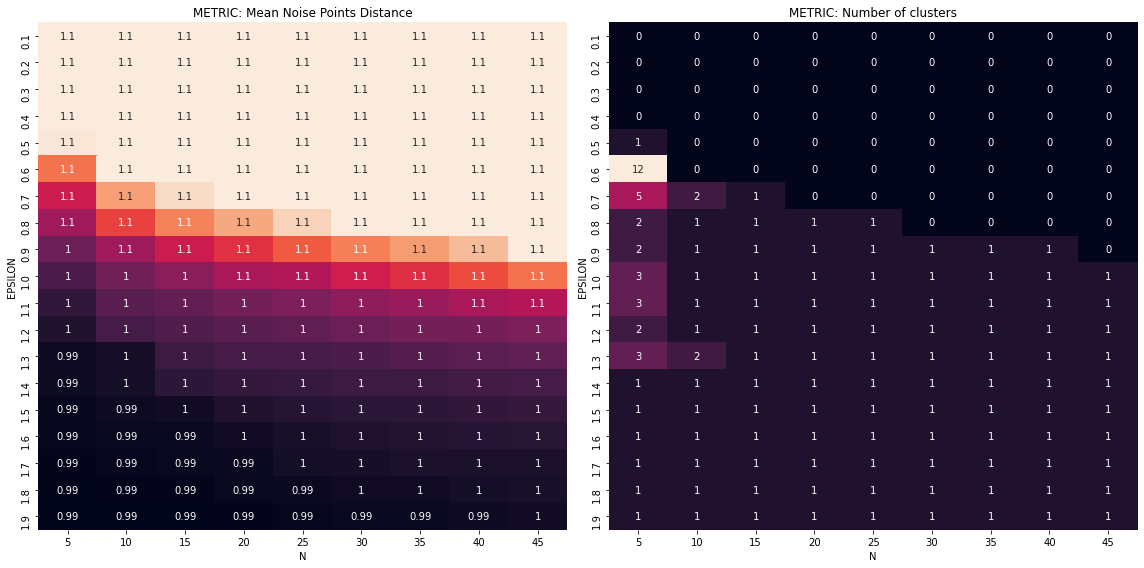

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [35]:
best_dbscan_model = DBSCAN(eps = 1.2, min_samples = 5)

# Fitting
best_dbscan_model.fit(scaled_features)

x = df[df["NotValid"] == False][features].copy()
# Extracting labels
x["Label"] = best_dbscan_model.labels_

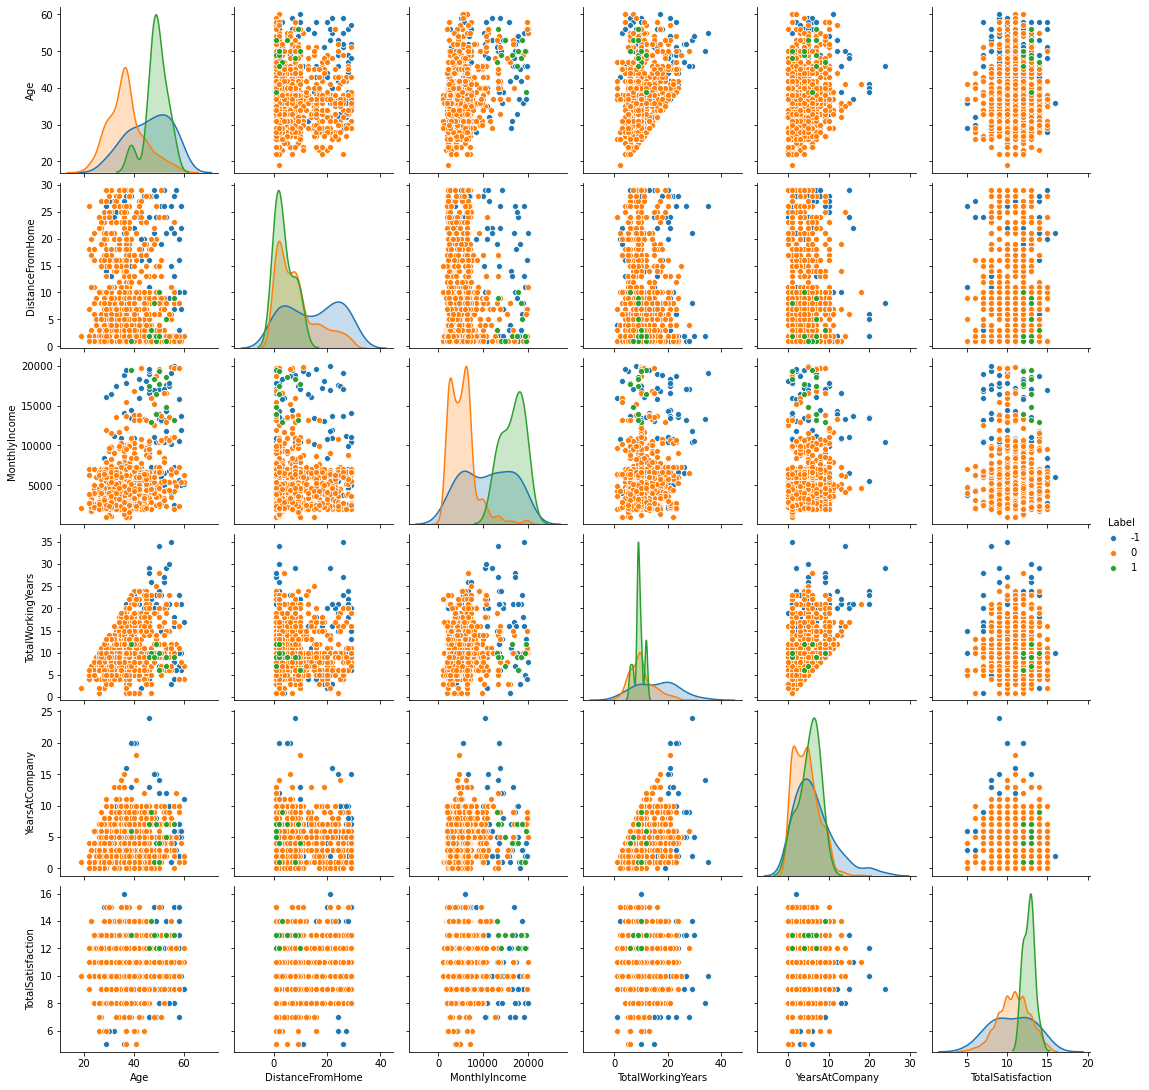

In [36]:
sns.pairplot(x, hue = "Label" )
plt.show()

# Prova solo dei Non Validi

In [37]:
# Risultati della grid Search
# Dataframe per la metrica sulla distanza media dei noise points dai 5 punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [38]:
# Esecuzione della grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[df["NotValid"] == True][features])

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = tuning(eps, min_samples, scaled_features, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 |  1.03    0
  2 | Tested with eps = 0.1 and min_samples =  10 |  1.03    0
  3 | Tested with eps = 0.1 and min_samples =  15 |  1.03    0
  4 | Tested with eps = 0.1 and min_samples =  20 |  1.03    0
  5 | Tested with eps = 0.1 and min_samples =  25 |  1.03    0
  6 | Tested with eps = 0.1 and min_samples =  30 |  1.03    0
  7 | Tested with eps = 0.1 and min_samples =  35 |  1.03    0
  8 | Tested with eps = 0.1 and min_samples =  40 |  1.03    0
  9 | Tested with eps = 0.1 and min_samples =  45 |  1.03    0
 10 | Tested with eps = 0.2 and min_samples =   5 |  1.03    0
 11 | Tested with eps = 0.2 and min_samples =  10 |  1.03    0
 12 | Tested with eps = 0.2 and min_samples =  15 |  1.03    0
 13 | Tested with eps = 0.2 and min_samples =  20 |  1.03    0
 14 | Tested with eps = 0.2 and min_samples =  25

134 | Tested with eps = 1.5 and min_samples =  40 | 0.767    1
135 | Tested with eps = 1.5 and min_samples =  45 | 0.772    1
136 | Tested with eps = 1.6 and min_samples =   5 | 0.726    1
137 | Tested with eps = 1.6 and min_samples =  10 |  0.73    1
138 | Tested with eps = 1.6 and min_samples =  15 | 0.733    1
139 | Tested with eps = 1.6 and min_samples =  20 | 0.735    1
140 | Tested with eps = 1.6 and min_samples =  25 | 0.741    1
141 | Tested with eps = 1.6 and min_samples =  30 | 0.748    1
142 | Tested with eps = 1.6 and min_samples =  35 | 0.756    1
143 | Tested with eps = 1.6 and min_samples =  40 | 0.761    1
144 | Tested with eps = 1.6 and min_samples =  45 | 0.762    1
145 | Tested with eps = 1.7 and min_samples =   5 | 0.723    1
146 | Tested with eps = 1.7 and min_samples =  10 | 0.725    1
147 | Tested with eps = 1.7 and min_samples =  15 | 0.729    1
148 | Tested with eps = 1.7 and min_samples =  20 | 0.732    1
149 | Tested with eps = 1.7 and min_samples =  25 | 0.7

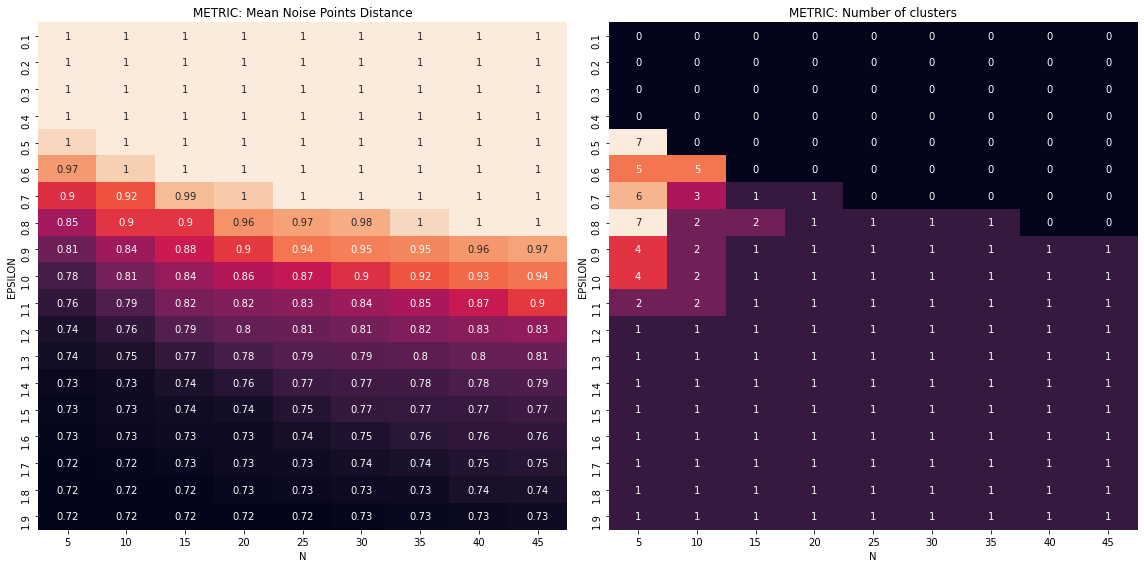

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [40]:
best_dbscan_model = DBSCAN(eps = 0.8, min_samples = 10)

# Fitting
best_dbscan_model.fit(scaled_features)

x = df[df["NotValid"] == True][features].copy()
# Extracting labels
x["Label"] = best_dbscan_model.labels_

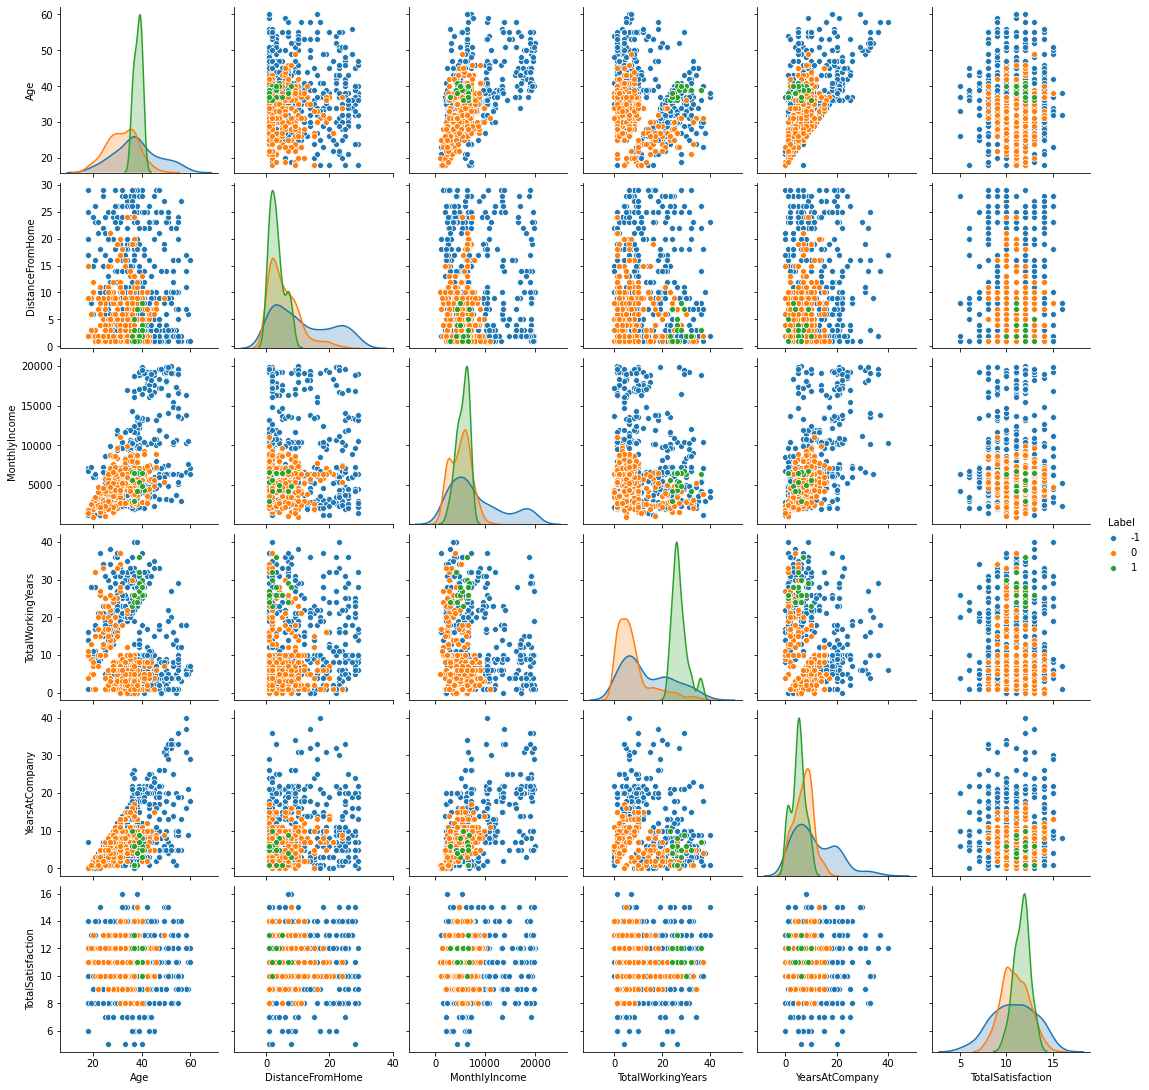

In [41]:
sns.pairplot(x, hue = "Label" )
plt.show()

# Prova con Features Diverse

In [55]:
# Risultati della grid Search
# Dataframe per la metrica sulla distanza media dei noise points dai 5 punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [56]:
# Esecuzione della grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

features = ["YearsWithCurrManager", "YearsSinceLastPromotion", "YearsInCurrentRole", "YearsAtCompany"]
scaler = RobustScaler()
#scaled_features = scaler.fit_transform(df[df["NotValid"] == False][features])
scaled_features = scaler.fit_transform(df[features])

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = tuning(eps, min_samples, scaled_features, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.324   36
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.327   15
  3 | Tested with eps = 0.1 and min_samples =  15 |  0.32    6
  4 | Tested with eps = 0.1 and min_samples =  20 |  0.33    1
  5 | Tested with eps = 0.1 and min_samples =  25 | 0.326    0
  6 | Tested with eps = 0.1 and min_samples =  30 | 0.326    0
  7 | Tested with eps = 0.1 and min_samples =  35 | 0.326    0
  8 | Tested with eps = 0.1 and min_samples =  40 | 0.326    0
  9 | Tested with eps = 0.1 and min_samples =  45 | 0.326    0
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.298   17
 11 | Tested with eps = 0.2 and min_samples =  10 | 0.302    8
 12 | Tested with eps = 0.2 and min_samples =  15 | 0.324    5
 13 | Tested with eps = 0.2 and min_samples =  20 |  0.35    5
 14 | Tested with eps = 0.2 and min_samples =  25

129 | Tested with eps = 1.5 and min_samples =  15 | 0.629    1
130 | Tested with eps = 1.5 and min_samples =  20 | 0.629    1
131 | Tested with eps = 1.5 and min_samples =  25 | 0.629    1
132 | Tested with eps = 1.5 and min_samples =  30 | 0.628    1
133 | Tested with eps = 1.5 and min_samples =  35 | 0.627    1
134 | Tested with eps = 1.5 and min_samples =  40 | 0.627    1
135 | Tested with eps = 1.5 and min_samples =  45 | 0.626    1
136 | Tested with eps = 1.6 and min_samples =   5 | 0.631    1
137 | Tested with eps = 1.6 and min_samples =  10 |  0.63    1
138 | Tested with eps = 1.6 and min_samples =  15 |  0.63    1
139 | Tested with eps = 1.6 and min_samples =  20 |  0.63    1
140 | Tested with eps = 1.6 and min_samples =  25 | 0.629    1
141 | Tested with eps = 1.6 and min_samples =  30 | 0.629    1
142 | Tested with eps = 1.6 and min_samples =  35 | 0.629    1
143 | Tested with eps = 1.6 and min_samples =  40 | 0.628    1
144 | Tested with eps = 1.6 and min_samples =  45 | 0.6

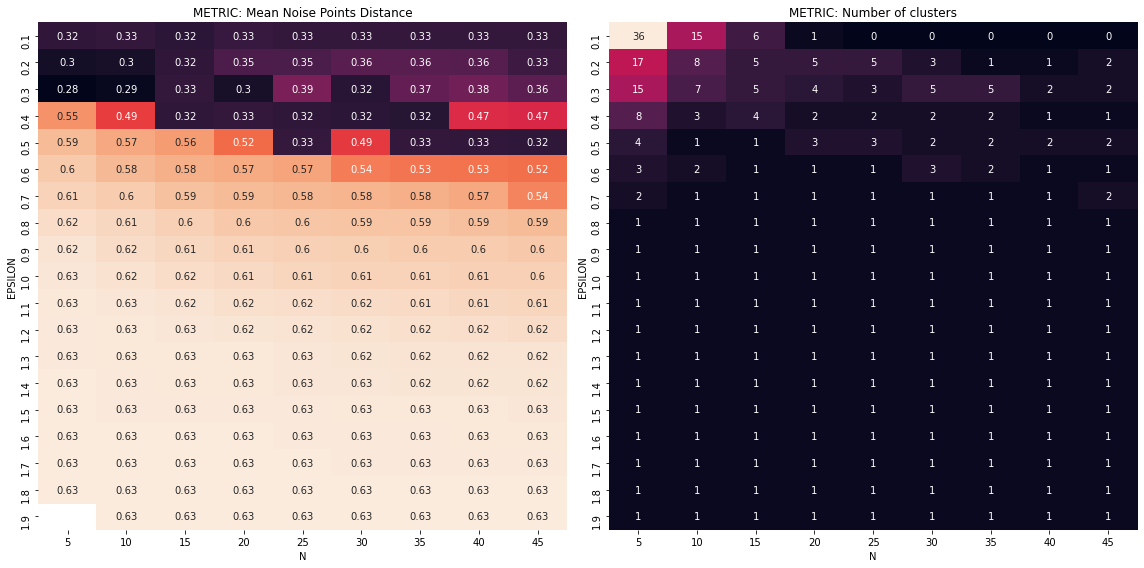

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [58]:
best_dbscan_model = DBSCAN(eps = 0.6, min_samples = 5)

# Fitting
best_dbscan_model.fit(scaled_features)

#x = df[df["NotValid"] == False][features].copy()
x = df[features].copy()
# Extracting labels
x["Label"] = best_dbscan_model.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


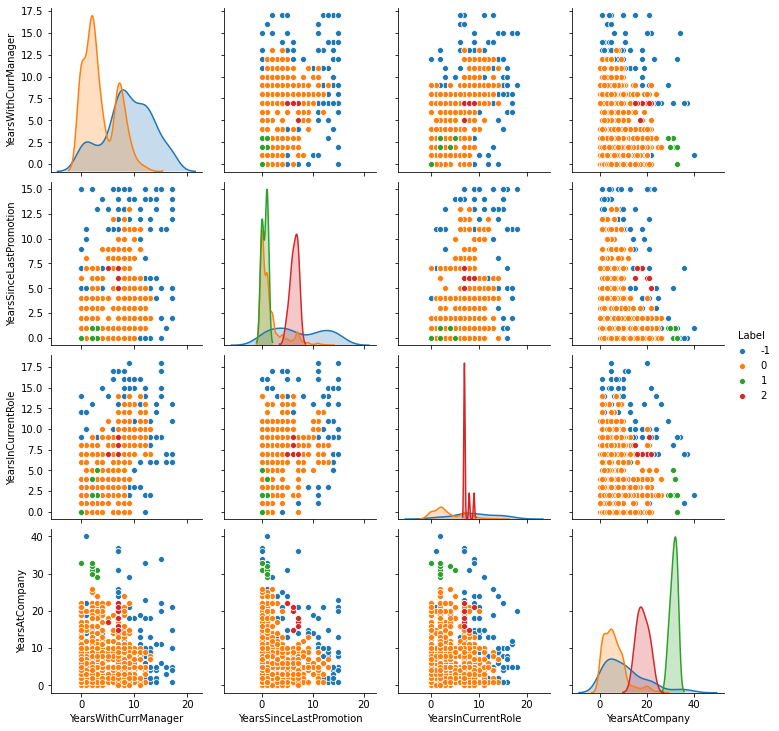

In [59]:
sns.pairplot(x, hue = "Label" )
plt.show()

(array([-1,  0,  1,  2], dtype=int64),
 array([ 446, 1003,   11,   10], dtype=int64))